In [1]:
"""
BUAN 6341: Applied Machine Learning
Homework 2

Siddhartha Shankar
"""
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()


"C:\\Users\\s_s11\\OneDrive\\Desktop\\Sem 4 - Fall'19\\Applied Machine Learning\\Homework\\Homework 2"

In [3]:
Bank_mktng_Data = pd.read_csv("bank-additional-full.csv",delimiter=';')
Bank_mktng_Data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(Bank_mktng_Data.isnull().any())
print(Bank_mktng_Data.isnull().sum())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
Bank_mktng_Data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


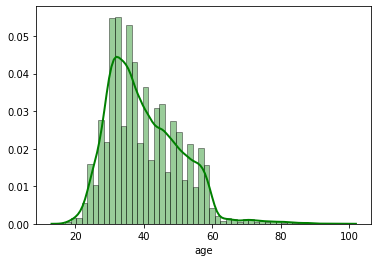

In [6]:
sb.distplot(Bank_mktng_Data['age'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

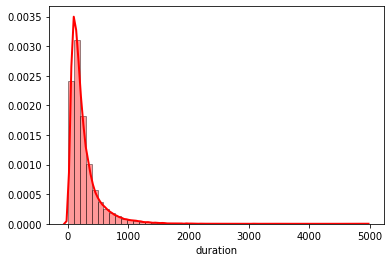

In [7]:
sb.distplot(Bank_mktng_Data['duration'], hist=True, kde=True, 
             bins= 50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

(array([2.420e+02, 2.122e+03, 6.966e+03, 8.963e+03, 5.475e+03, 5.589e+03,
        4.651e+03, 3.598e+03, 2.389e+03, 5.300e+02, 1.940e+02, 2.000e+02,
        1.050e+02, 9.900e+01, 5.300e+01, 8.000e+00, 4.000e+00]),
 array([17.        , 21.76470588, 26.52941176, 31.29411765, 36.05882353,
        40.82352941, 45.58823529, 50.35294118, 55.11764706, 59.88235294,
        64.64705882, 69.41176471, 74.17647059, 78.94117647, 83.70588235,
        88.47058824, 93.23529412, 98.        ]),
 <a list of 17 Patch objects>)

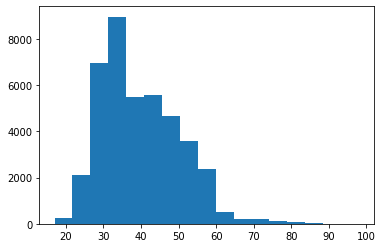

In [8]:
plt.hist(Bank_mktng_Data.age, bins = 17)

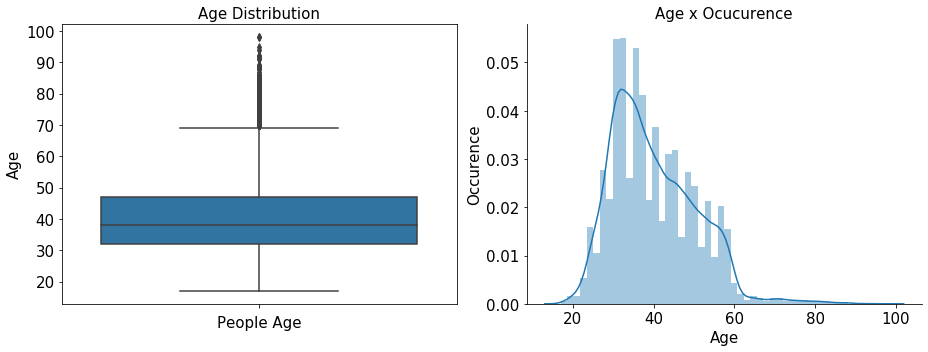

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sb.boxplot(x = 'age', data = Bank_mktng_Data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sb.distplot(Bank_mktng_Data['age'], ax = ax2)
sb.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [10]:
print('1º Quartile: ', Bank_mktng_Data['age'].quantile(q = 0.25))
print('2º Quartile: ', Bank_mktng_Data['age'].quantile(q = 0.50))
print('3º Quartile: ', Bank_mktng_Data['age'].quantile(q = 0.75))
print('4º Quartile: ', Bank_mktng_Data['age'].quantile(q = 1.00))

print('Ages above: ', Bank_mktng_Data['age'].quantile(q = 0.75) + 
                      1.5*(Bank_mktng_Data['age'].quantile(q = 0.75) - Bank_mktng_Data['age'].quantile(q = 0.25)), 'are outliers')

print('Numerber of outliers: ', Bank_mktng_Data[Bank_mktng_Data['age'] > 69.6]['age'].count())
print('Number of clients: ', len(Bank_mktng_Data))
#Outliers in %
print('Outliers are:', round(Bank_mktng_Data[Bank_mktng_Data['age'] > 69.6]['age'].count()*100/len(Bank_mktng_Data),2), '%')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


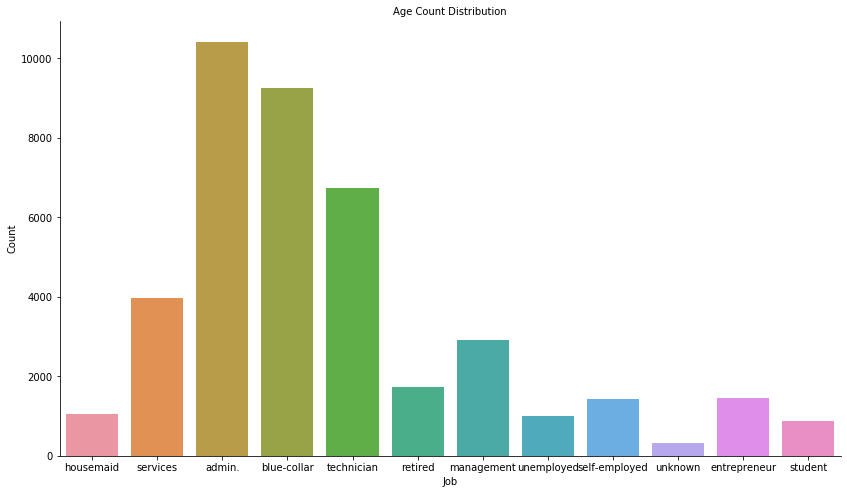

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
sb.countplot(x = 'job', data = Bank_mktng_Data)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sb.despine()

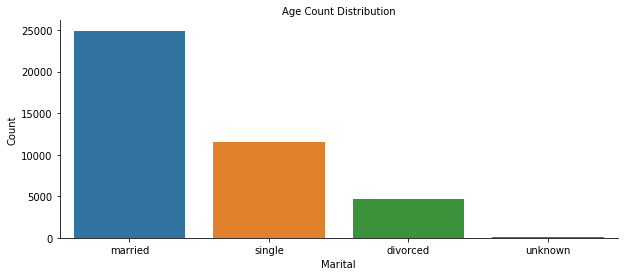

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
sb.countplot(x = 'marital', data = Bank_mktng_Data)
ax.set_xlabel('Marital', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sb.despine()

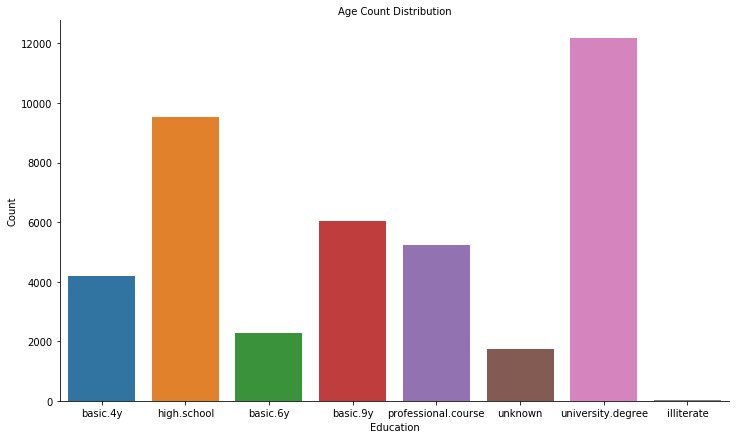

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
sb.countplot(x = 'education', data = Bank_mktng_Data)
ax.set_xlabel('Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sb.despine()

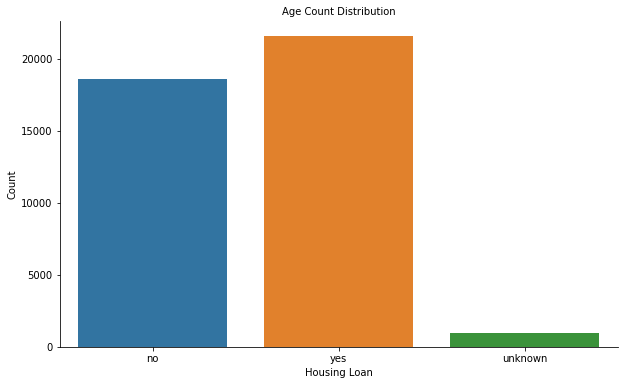

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sb.countplot(x = 'housing', data = Bank_mktng_Data)
ax.set_xlabel('Housing Loan', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sb.despine()

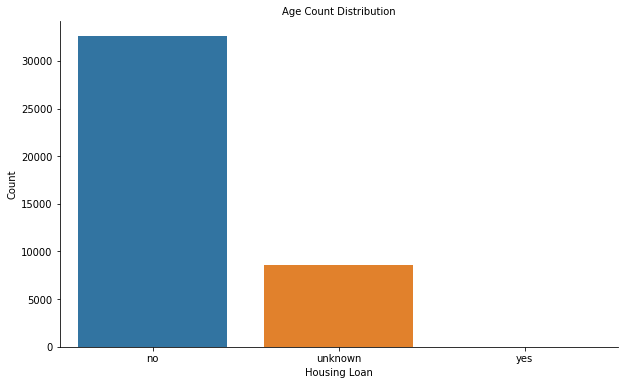

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sb.countplot(x = 'default', data = Bank_mktng_Data)
ax.set_xlabel('Housing Loan', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sb.despine()

In [16]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
Bank_mktng_Data['job']      = labelencoder_X.fit_transform(Bank_mktng_Data['job']) 
Bank_mktng_Data['marital']  = labelencoder_X.fit_transform(Bank_mktng_Data['marital']) 
Bank_mktng_Data['education']= labelencoder_X.fit_transform(Bank_mktng_Data['education']) 
Bank_mktng_Data['default']  = labelencoder_X.fit_transform(Bank_mktng_Data['default']) 
Bank_mktng_Data['housing']  = labelencoder_X.fit_transform(Bank_mktng_Data['housing']) 
Bank_mktng_Data['loan']     = labelencoder_X.fit_transform(Bank_mktng_Data['loan']) 

In [17]:
#function to create group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(Bank_mktng_Data);

In [18]:
Bank_mktng_Data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,2,7,1,2,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,2,1,1,7,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


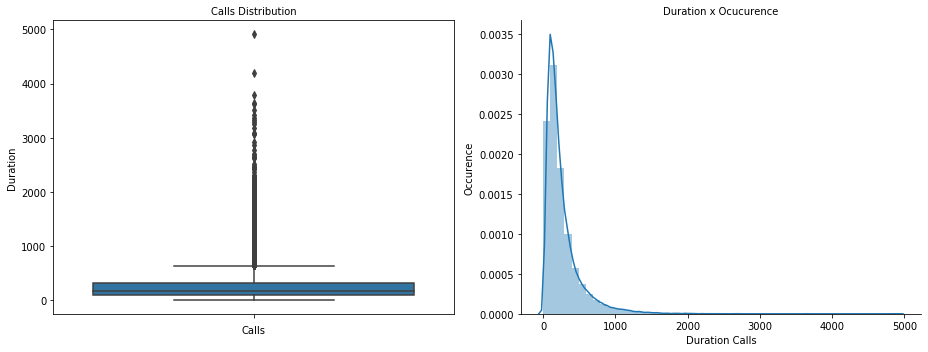

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sb.boxplot(x = 'duration', data = Bank_mktng_Data, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sb.distplot(Bank_mktng_Data['duration'], ax = ax2)
sb.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [20]:
print("Max duration  call in minutes:  ", round((Bank_mktng_Data['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((Bank_mktng_Data['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((Bank_mktng_Data['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((Bank_mktng_Data['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [21]:
# Quartiles
print('1º Quartile: ', Bank_mktng_Data['duration'].quantile(q = 0.25))
print('2º Quartile: ', Bank_mktng_Data['duration'].quantile(q = 0.50))
print('3º Quartile: ', Bank_mktng_Data['duration'].quantile(q = 0.75))
print('4º Quartile: ', Bank_mktng_Data['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', Bank_mktng_Data['duration'].quantile(q = 0.75) + 
                      1.5*(Bank_mktng_Data['duration'].quantile(q = 0.75) - Bank_mktng_Data['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [22]:
print('Numerber of outliers: ', Bank_mktng_Data[Bank_mktng_Data['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(Bank_mktng_Data))
#Outliers in %
print('Outliers are:', round(Bank_mktng_Data[Bank_mktng_Data['duration'] > 644.5]['duration'].count()*100/len(Bank_mktng_Data),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [23]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
Bank_mktng_Data['contact']     = labelencoder_X.fit_transform(Bank_mktng_Data['contact']) 
Bank_mktng_Data['month']       = labelencoder_X.fit_transform(Bank_mktng_Data['month']) 
Bank_mktng_Data['day_of_week'] = labelencoder_X.fit_transform(Bank_mktng_Data['day_of_week']) 

In [24]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(Bank_mktng_Data);

In [25]:
Bank_mktng_Data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,2,7,1,2,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,2,1,1,7,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
print(Bank_mktng_Data['poutcome'].nunique())
print(Bank_mktng_Data['poutcome'].unique())

3
['nonexistent' 'failure' 'success']


In [27]:
Bank_mktng_Data['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [28]:
Bank_mktng_Data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
5,2,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
7,2,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
Bank_mktng_Data.y = pd.get_dummies(Bank_mktng_Data['y'], columns = ['y'], prefix = ['y'], drop_first = True)


In [42]:
Bank_mktng_Data.y.describe()

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [31]:
Bank_mktng_Data.shape

(41188, 21)

In [32]:
Y = Bank_mktng_Data.iloc[:,20]
print(Y.shape)
X = Bank_mktng_Data.iloc[:,0:20]
print(X.shape)

(41188,)
(41188, 20)


In [33]:
Y.describe()

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [34]:
X.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,1.978610,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,2.568588,2.567593,962.475454,0.172963,1.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,0.735758,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,1.238277,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,1.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,2.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,2.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,2.000000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,3.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4.000000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,5.000000,56.000000,999.000000,7.000000,3.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
import random
from sklearn.model_selection import train_test_split
random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(32950, 20) (32950,)
(8238, 20) (8238,)


In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=False, random_state=0)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

confusion_matrix = confusion_matrix(Y_test, predictions)
print(confusion_matrix)

print(classification_report(Y_test,predictions))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, predictions),3)*100))

CV_score_LogModel = (cross_val_score(logmodel, X, Y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
Logistic_CV = round(CV_score_LogModel,2)*100
print("Cross-Validation Score: {}".format(Logistic_CV))

[[7116  166]
 [ 603  353]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7282
           1       0.68      0.37      0.48       956

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.89      0.91      0.89      8238

Accuracy Score: 90.7
Cross-Validation Score: 90.0


In [45]:
from sklearn.model_selection import learning_curve

def lrng_curve(Classifier,n):
    
    train_sizes, train_scores, test_scores = learning_curve(Classifier, X_train, Y_train,cv=k_fold, scoring='accuracy',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
    plt.plot(train_sizes, test_mean, color="green", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [44]:
from sklearn.model_selection import learning_curve

def lrng_curve_roc_auc(classifier,n):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, Y_train, cv=k_fold, scoring='roc_auc',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("roc_auc"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

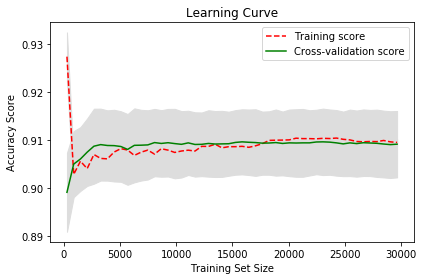

In [46]:
lrng_curve(LogisticRegression(),50)

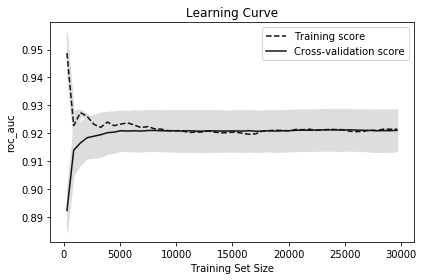

In [47]:
lrng_curve_roc_auc(LogisticRegression(),50)

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, Y_train)

svcpred = svc.predict(X_test)

print(confusion_matrix(Y_test, svcpred))
print(classification_report(Y_test,svcpred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred),3)*100))

CV_score_SVC_sigmoid = (cross_val_score(svc, X, Y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_sigmoid = round(CV_score_SVC_sigmoid,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_sigmoid))

[[6676  606]
 [ 595  361]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7282
           1       0.37      0.38      0.38       956

    accuracy                           0.85      8238
   macro avg       0.65      0.65      0.65      8238
weighted avg       0.85      0.85      0.85      8238

Accuracy Score: 85.39999999999999
Cross-Validation Score: 88.7


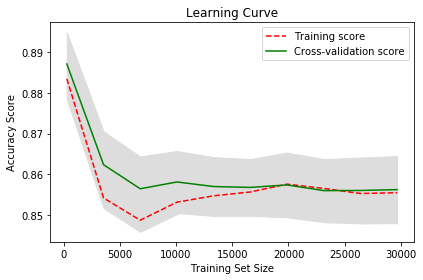

In [49]:
lrng_curve(SVC(kernel= 'sigmoid'),10)

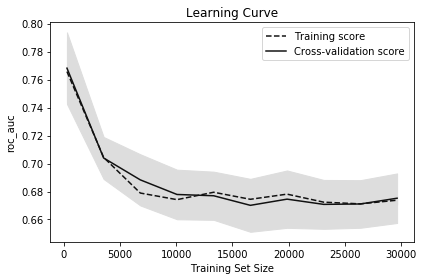

In [50]:
lrng_curve_roc_auc(SVC(kernel= 'sigmoid'),10)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train, Y_train)

svcpred_linear = svc_linear.predict(X_test)

print(confusion_matrix(Y_test, svcpred_linear))
print(classification_report(Y_test,svcpred_linear))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred_linear),3)*100))

CV_score_SVC_linear = (cross_val_score(svc_linear, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_linear = round(CV_score_SVC_linear,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_linear))

[[7167  115]
 [ 758  198]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7282
           1       0.63      0.21      0.31       956

    accuracy                           0.89      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238

Accuracy Score: 89.4
Cross-Validation Score: 90.0


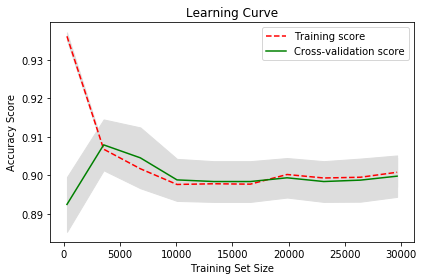

In [52]:
lrng_curve(SVC(kernel= 'linear'),10)

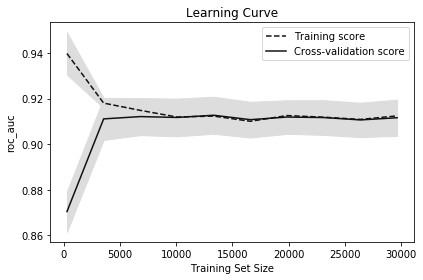

In [53]:
lrng_curve_roc_auc(SVC(kernel= 'linear'),10)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_gaussian = SVC(kernel = 'rbf')
svc_gaussian.fit(X_train, Y_train)

svcpred_gaussian = svc_gaussian.predict(X_test)

print(confusion_matrix(Y_test, svcpred_gaussian))
print(classification_report(Y_test,svcpred_gaussian))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred_gaussian),3)*100))

CV_score_SVC_gaussian = (cross_val_score(svc_gaussian, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_gaussian = round(CV_score_SVC_gaussian,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_gaussian))

[[7163  119]
 [ 668  288]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7282
           1       0.71      0.30      0.42       956

    accuracy                           0.90      8238
   macro avg       0.81      0.64      0.69      8238
weighted avg       0.89      0.90      0.89      8238

Accuracy Score: 90.4
Cross-Validation Score: 90.7


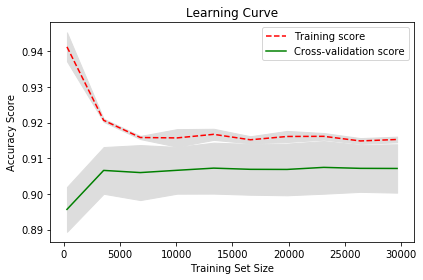

In [55]:
lrng_curve(SVC(kernel = 'rbf'),10)

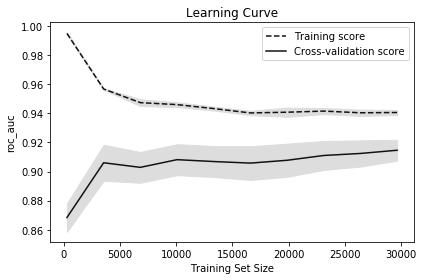

In [56]:
lrng_curve_roc_auc(SVC(kernel = 'rbf'),10)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

d_tree = DecisionTreeClassifier(criterion='gini', max_depth = 7) #criterion = entopy, gini
d_tree.fit(X_train, Y_train)
d_tree_pred = d_tree.predict(X_test)

print(confusion_matrix(Y_test, d_tree_pred))
print(classification_report(Y_test,d_tree_pred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, d_tree_pred),3)*100))

CV_score_dtree = (cross_val_score(d_tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
d_tree_CV = round(CV_score_dtree,3)*100
print("Cross-Validation Score: {}".format(d_tree_CV))

[[7062  220]
 [ 512  444]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7282
           1       0.67      0.46      0.55       956

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy Score: 91.10000000000001
Cross-Validation Score: 91.10000000000001


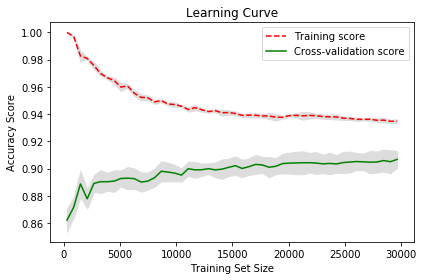

In [72]:
lrng_curve(DecisionTreeClassifier(criterion='gini', max_depth = 10) ,50)

In [69]:
lrng_curve_roc_auc(DecisionTreeClassifier(criterion='gini', max_depth = 7) ,50)

KeyboardInterrupt: 

In [60]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
AdaBoost_classifier.fit(X_train, Y_train)
Imp_features = AdaBoost_classifier.feature_importances_

AdaBoost_pred = AdaBoost_classifier.predict(X_test)

print(confusion_matrix(Y_test, AdaBoost_pred))
print(classification_report(Y_test,AdaBoost_pred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, AdaBoost_pred),3)*100))

CV_Score_AdaBoost = (cross_val_score(AdaBoost_classifier, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
AdaBoost_CV = round(CV_Score_AdaBoost,3)*100
print("Cross-Validation Score: {}".format(AdaBoost_CV))


[[7110  172]
 [ 558  398]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7282
           1       0.70      0.42      0.52       956

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy Score: 91.10000000000001
Cross-Validation Score: 91.2


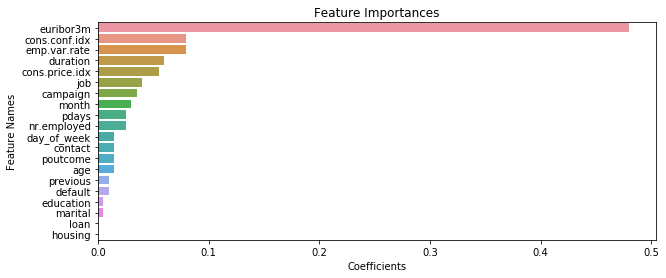

In [63]:
Imp_features = AdaBoost_classifier.feature_importances_

def plotfeatureimportances(train, importance):
    #Plots importance in a sorted order and shows the most significant variables at the top
    X = list(train.columns)
    X.remove('y')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10,4)
    sb.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')
    
plotfeatureimportances(Bank_mktng_Data,Imp_features)

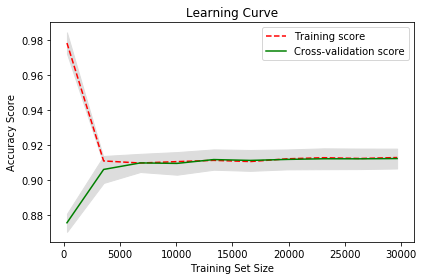

In [64]:
lrng_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200),10)

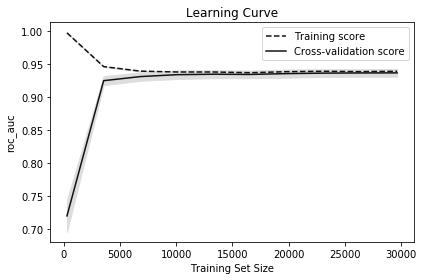

In [65]:
lrng_curve_roc_auc(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200),10)

In [66]:
models = pd.DataFrame({
                'Models': ['Logistic Model','SVM: kernel=sigmoid','SVM: kernel=linear','SVM: kernel=Gaussian','Decision Tree Classifier',
                           'AdaBoost Classifier'],
                'Accuracy':  [Logistic_CV, SVM_CV_sigmoid, SVM_CV_linear, SVM_CV_gaussian,d_tree_CV, AdaBoost_CV]})

models.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
5,AdaBoost Classifier,91.2
4,Decision Tree Classifier,91.1
3,SVM: kernel=Gaussian,90.7
0,Logistic Model,90.0
2,SVM: kernel=linear,90.0
1,SVM: kernel=sigmoid,88.7


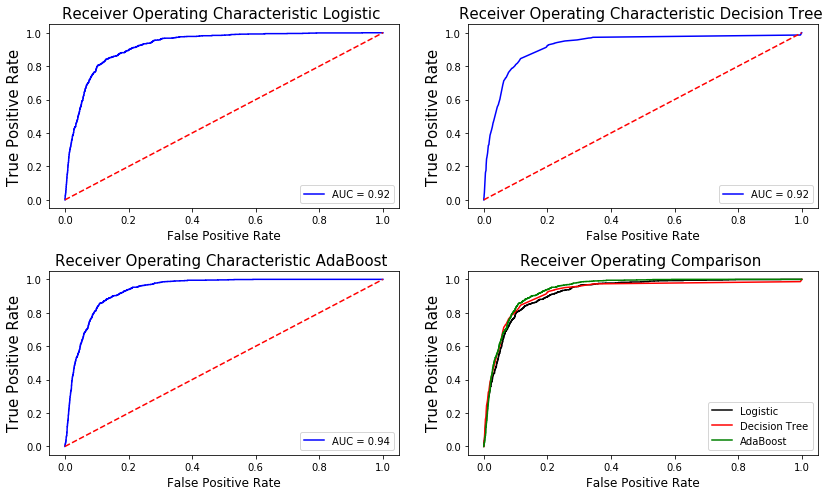

In [68]:
from sklearn import metrics
#ROCR curve comparison

#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (12,7))

# Logistic Model
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(Y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=15)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

# Decision Tree Classifier
probs = d_tree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(Y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=15)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

# AdaBoost Classifier
probs = AdaBoost_classifier.predict_proba(X_test)
preds = probs[:,1]
fprada, tprada, thresholdada = metrics.roc_curve(Y_test, preds)
roc_aucada = metrics.auc(fprada, tprada)

ax_arr[1,0].plot(fprada, tprada, 'b', label = 'AUC = %0.2f' % roc_aucada)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic AdaBoost ',fontsize=15)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

#ALL PLOTS ----------------------------------
ax_arr[1,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='black')
ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='red')
ax_arr[1,1].plot(fprada, tprada, 'b', label = 'AdaBoost', color='green')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=15)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 